In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = 10, 6 # It’s a dictionary of most matplotlib styling that you set at the start of your notebook and it will apply to all your plots.It’s a dictionary of most matplotlib styling that you set at the start of your notebook and it will apply to all your plots.


import pandas as pd
import numpy as np
import scipy as sc
from scipy import signal

import matplotlib.pyplot as plt
import h5py
import obspy
from obspy.signal.filter import envelope
from obspy.clients.fdsn import Client
from tqdm import tqdm #tqdm is a Python library that allows you to output a smart progress bar 
from glob import glob #is a function that’s used to search for files that match a specific file pattern or name.
import tsfel #Time Series Feature Extraction Library is a Python package for feature extraction on time series data.
import random

from scipy import signal


client = Client('IRIS')

import os
import pickle #Pickling” is the process whereby a Python object hierarchy is converted into a byte stream

import matplotlib.pyplot as plt
import numpy as np

from scatseisnet import ScatteringNetwork
import matplotlib.dates as mdates

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans #The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset

#%config InlineBackend.figure_format = "png"

#from Feature_Extraction import compute_hibert

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [14]:
def extract_waveforms(cat, file_name):
    
    st = []
    cat_trace = cat['trace_name'].values 
    for i in range(len(cat_trace)):

            
 
        f = h5py.File(file_name, 'r')
            
            
        bucket = cat['trace_name'].values[i].split('$')[0]
        # ind means index
        ind = int(cat['trace_name'].values[i].split('$')[1].split(',')[0])
        # ENZ
        st.append(f['/data/'+bucket][ind, :3, :18000])
        
    return st
def convert_into_traces(stream, cat):
    channels = ['BHE','BHN','BHZ']
    
    st = []
    for i in range(len(stream)):
        for j in range(len(stream[i])):
            tr = obspy.Trace(stream[i][j])
            tr.stats.channel = channels[j]
            tr.stats.station = cat['station_code'].values[i]
            tr.stats.network = cat['station_network_code'].values[i]
            tr.stats.sampling_rate = 100
            tr.stats.starttime = obspy.UTCDateTime(cat['trace_start_time'].values[i])
            
            st.append(tr)
            
    return obspy.Stream(st)

def plot_waveforms(tr_exotic_Z, title = 'Thunder Waveforms', xlim = [10,100]):



    # Create a figure with subplots
    # For a 800x400 pixel, 100 dots-per-inch figure, you can write ig = plt.figure(figsize=(8,4), dpi=100)
    fig, axs = plt.subplots(len(tr_exotic_Z), 2, figsize=(12, 12))

    # Plot time series and spectrograms
    for i in range(len(tr_exotic_Z)):
        time = tr_exotic_Z[i].times()
        # Plot time series in left subplot
        axs[i, 0].plot(time, tr_exotic_Z[i].data)
        axs[i, 0].set_xlabel('Time')
        axs[i, 0].set_ylabel('Amplitude')
        axs[i, 0].set_title(tr_exotic_Z[i].id)
        axs[i,0].set_xlim(xlim[0], xlim[1])

        # Compute and plot spectrogram in right subplot
        f, t_spec, Sxx = signal.spectrogram(tr_exotic_Z[i].data, fs = 100)
        # The extent keyword arguments controls the bounding box in data coordinates that the image will fill specified as (left, right, bottom, top) in data coordinates
        axs[i, 1].imshow(Sxx, aspect='auto', cmap='jet', origin='lower', extent=[t_spec.min(), t_spec.max(), f.min(), f.max()])
        axs[i, 1].set_xlabel('Time')
        axs[i, 1].set_ylabel('Frequency')
        axs[i, 1].set_title(str(tr_exotic_Z[i].stats.starttime))
        axs[i, 1].set_xlim(xlim[0], xlim[1])
        axs[i, 1].set_ylim(0, 30)
        #axs[i, 1].set_yscale('log')

    # Labelling the figure. 
    fig.suptitle(title, fontsize = 20)


    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

In [27]:
help(obspy.Stream())

Help on Stream in module obspy.core.stream object:

class Stream(builtins.object)
 |  Stream(traces=None)
 |  
 |  List like object of multiple ObsPy :class:`~obspy.core.trace.Trace`
 |  objects.
 |  
 |  :type traces: list of :class:`~obspy.core.trace.Trace`, optional
 |  :param traces: Initial list of ObsPy :class:`~obspy.core.trace.Trace`
 |      objects.
 |  
 |  .. rubric:: Basic Usage
 |  
 |  >>> trace1 = Trace()
 |  >>> trace2 = Trace()
 |  >>> stream = Stream(traces=[trace1, trace2])
 |  >>> print(stream)  # doctest: +ELLIPSIS
 |  2 Trace(s) in Stream:
 |  ...
 |  
 |  .. rubric:: Supported Operations
 |  
 |  ``stream = streamA + streamB``
 |      Merges all traces within the two Stream objects ``streamA`` and
 |      ``streamB`` into the new Stream object ``stream``.
 |      See also: :meth:`Stream.__add__`.
 |  ``stream += streamA``
 |      Extends the Stream object ``stream`` with all traces from ``streamA``.
 |      See also: :meth:`Stream.__iadd__`.
 |  ``len(stream)``
 

In [3]:
comcat_file_name = "/data/whd01/yiyu_data/PNWML/comcat_waveforms.hdf5"
comcat_csv_file = "/data/whd01/yiyu_data/PNWML/comcat_metadata.csv"

In [5]:
cat_comcat = pd.read_csv(comcat_csv_file)

In [16]:
cat_comcat

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_type,source_depth_km,preferred_source_magnitude,preferred_source_magnitude_type,preferred_source_magnitude_uncertainty,source_depth_uncertainty_km,...,trace_snr_db,source_type_pnsn_label,source_local_magnitude,source_local_magnitude_uncertainty,source_duration_magnitude,source_duration_magnitude_uncertainty,source_hand_magnitude,trace_missing_channel,trace_has_offset,snr_final
0,uw10564613,2002-10-03T01:56:49.530000Z,48.553,-122.520,earthquake,14.907,2.10,md,0.030,1.68,...,6.135|3.065|11.766,eq,NaN,NaN,2.10,0.030,NaN,0,1,11.766
1,uw10564613,2002-10-03T01:56:49.530000Z,48.553,-122.520,earthquake,14.907,2.10,md,0.030,1.68,...,nan|nan|22.583,eq,NaN,NaN,2.10,0.030,NaN,2,0,22.583
2,uw10564613,2002-10-03T01:56:49.530000Z,48.553,-122.520,earthquake,14.907,2.10,md,0.030,1.68,...,1.756|3.057|3.551,eq,NaN,NaN,2.10,0.030,NaN,0,1,3.551
3,uw10564613,2002-10-03T01:56:49.530000Z,48.553,-122.520,earthquake,14.907,2.10,md,0.030,1.68,...,nan|nan|27.185,eq,NaN,NaN,2.10,0.030,NaN,2,0,27.185
4,uw10568748,2002-09-26T07:00:04.860000Z,48.481,-123.133,earthquake,22.748,2.90,md,0.030,0.91,...,10.881|17.107|2.242,eq,NaN,NaN,2.90,0.030,NaN,0,1,2.242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183904,uw61802032,2022-01-15T01:30:38.770000Z,48.617,-123.032,earthquake,12.410,0.26,md,0.416,0.74,...,17.389|11.516|12.029,eq,NaN,NaN,0.26,0.416,NaN,0,0,12.029
183905,uw61802032,2022-01-15T01:30:38.770000Z,48.617,-123.032,earthquake,12.410,0.26,md,0.416,0.74,...,9.564|8.578|2.713,eq,NaN,NaN,0.26,0.416,NaN,0,0,2.713
183906,uw61802032,2022-01-15T01:30:38.770000Z,48.617,-123.032,earthquake,12.410,0.26,md,0.416,0.74,...,6.539|-0.560|-0.724,eq,NaN,NaN,0.26,0.416,NaN,0,0,-0.724
183907,uw61802032,2022-01-15T01:30:38.770000Z,48.617,-123.032,earthquake,12.410,0.26,md,0.416,0.74,...,3.382|1.918|2.539,eq,NaN,NaN,0.26,0.416,NaN,0,0,2.539


In [6]:
snrs_comcat = []
for i in range(len(cat_comcat['trace_snr_db'])):
    snrs_comcat.append(np.array(cat_comcat['trace_snr_db'].values[i].split('|')).astype('float')[-1])

In [9]:
cat_comcat['snr_final'] = snrs_comcat

In [10]:
cat_earthquake = cat_comcat[cat_comcat['source_type'] == 'earthquake']

In [12]:
cat_earthquake_good = cat_earthquake.sort_values(by = 'snr_final', ascending = False).iloc[0:5]
# ascending = False means descending

In [20]:
stream_earthquake = extract_waveforms(cat_earthquake_good, comcat_file_name)
tr_earthquake_Z = convert_into_traces(stream_earthquake, cat_earthquake_good).select(channel = '*HZ')

In [ ]:
plot_waveforms(tr_earthquake_Z, title = 'Earthquake Waveforms', xlim = [40,100])

In [24]:
h5py.File(comcat_file_name, 'r')

<HDF5 file "comcat_waveforms.hdf5" (mode r)>

In [25]:
stream_earthquake

[array([[-0.74775158, -1.98741322, -1.72394227, ..., 13.97791801,
         32.24048674, 10.24549598],
        [ 1.49893791,  3.99555207,  3.99068665, ..., 31.76411998,
         12.75463945, -0.49977364],
        [ 0.49821228,  0.50241241, -1.49593067, ..., 44.49748751,
         62.50504953, 27.74875629]]),
 array([[ 0.99960204,  1.99960944,  2.2488787 , ..., 10.75080658,
          3.49980243,  0.4995582 ],
        [ 0.75005645,  2.0015035 ,  3.00312382, ...,  9.24652569,
          2.49769949,  0.2490625 ],
        [-0.99985426, -2.74957067, -2.74869336, ...,  7.99933512,
          5.24945997,  0.99960043]]),
 array([[-4.98653611e-01, -1.74591001e+00, -1.74189332e+00, ...,
         -1.50086422e+01, -6.50378167e+00, -1.25050026e+00],
        [-2.21320641e-03,  2.41997193e-01,  1.23422430e+00, ...,
          1.07655085e+01,  4.75760398e+00,  1.25161378e+00],
        [-9.99083503e-01, -3.24799687e+00, -4.49611273e+00, ...,
         -6.75345258e+00, -2.75155628e+00, -7.50007940e-01]]),
 arr

In [28]:
tr_earthquake_Z

5 Trace(s) in Stream:
PB.B202..BHZ | 2018-01-03T08:35:35.940000Z - 2018-01-03T08:38:05.940000Z | 100.0 Hz, 15001 samples
PB.B201..BHZ | 2013-08-03T02:10:26.250000Z - 2013-08-03T02:12:56.250000Z | 100.0 Hz, 15001 samples
PB.B003..BHZ | 2018-11-19T11:08:23.050000Z - 2018-11-19T11:10:53.050000Z | 100.0 Hz, 15001 samples
PB.B943..BHZ | 2008-07-31T05:01:53.130000Z - 2008-07-31T05:04:23.130000Z | 100.0 Hz, 15001 samples
UW.DOSE..BHZ | 2014-09-17T10:05:22.840000Z - 2014-09-17T10:07:52.840000Z | 100.0 Hz, 15001 samples

In [26]:
len(stream_earthquake)

5

In [32]:
a = convert_into_traces(stream_earthquake, cat_earthquake_good)
a

15 Trace(s) in Stream:
PB.B202..BHE | 2018-01-03T08:35:35.940000Z - 2018-01-03T08:38:05.940000Z | 100.0 Hz, 15001 samples
PB.B202..BHN | 2018-01-03T08:35:35.940000Z - 2018-01-03T08:38:05.940000Z | 100.0 Hz, 15001 samples
PB.B202..BHZ | 2018-01-03T08:35:35.940000Z - 2018-01-03T08:38:05.940000Z | 100.0 Hz, 15001 samples
PB.B201..BHE | 2013-08-03T02:10:26.250000Z - 2013-08-03T02:12:56.250000Z | 100.0 Hz, 15001 samples
PB.B201..BHN | 2013-08-03T02:10:26.250000Z - 2013-08-03T02:12:56.250000Z | 100.0 Hz, 15001 samples
PB.B201..BHZ | 2013-08-03T02:10:26.250000Z - 2013-08-03T02:12:56.250000Z | 100.0 Hz, 15001 samples
PB.B003..BHE | 2018-11-19T11:08:23.050000Z - 2018-11-19T11:10:53.050000Z | 100.0 Hz, 15001 samples
PB.B003..BHN | 2018-11-19T11:08:23.050000Z - 2018-11-19T11:10:53.050000Z | 100.0 Hz, 15001 samples
PB.B003..BHZ | 2018-11-19T11:08:23.050000Z - 2018-11-19T11:10:53.050000Z | 100.0 Hz, 15001 samples
PB.B943..BHE | 2008-07-31T05:01:53.130000Z - 2008-07-31T05:04:23.130000Z | 100.0 Hz, 1

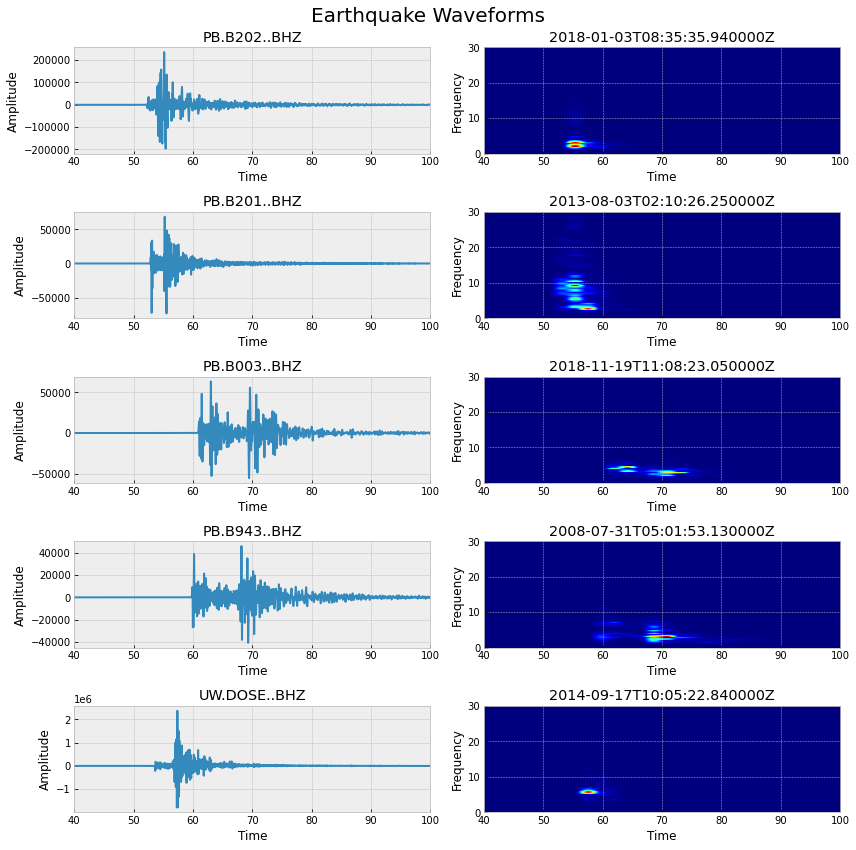

In [33]:
plot_waveforms(tr_earthquake_Z, title = 'Earthquake Waveforms', xlim = [40,100])

In [35]:
help(signal.spectrogram)

Help on function spectrogram in module scipy.signal._spectral_py:

spectrogram(x, fs=1.0, window=('tukey', 0.25), nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, mode='psd')
    Compute a spectrogram with consecutive Fourier transforms.
    
    Spectrograms can be used as a way of visualizing the change of a
    nonstationary signal's frequency content over time.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series. Defaults to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. If `window` is a string or tuple, it is
        passed to `get_window` to generate the window values, which are
        DFT-even by default. See `get_window` for a list of windows and
        required parameters. If `window` is array_like it will be used
        directly as the window and its length 